In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2014-12-27,428.9
2014-12-28,447.0
2014-12-29,516.3


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,460.071429
2000-01-14,375.842857
2000-01-21,544.685714
2000-01-28,611.442857
2000-02-04,530.300000
...,...
2014-12-05,395.628571
2014-12-12,455.342857
2014-12-19,351.714286


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,460.071429
2000-01-14,375.842857
2000-01-21,544.685714
2000-01-28,611.442857
2000-02-04,530.300000
...,...
2011-12-02,369.928571
2011-12-09,518.342857
2011-12-16,485.157143


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2011-12-29,525.3
2011-12-30,442.1
2011-12-31,164.2


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[563.3, 588. , 325.7, ..., 572.7, 375.6, 221.3],
       [283.9, 272.5, 284.1, ..., 506. , 544. , 477. ],
       [283.8, 467.2, 593.6, ..., 619. , 627.3, 623.3],
       ...,
       [377.7, 463.8, 548.8, ..., 571.3, 440.7, 229.7],
       [463.9, 543. , 509.8, ..., 534.9, 582.5, 571. ],
       [446.2, 520.9, 525.3, ..., 164.2, 592.1, 573.5]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[528.8051]]
[[514.0371]]
[[600.976]]
[[618.86475]]
[[553.07996]]
[[535.1753]]
[[618.9303]]
[[649.5283]]
[[623.53467]]
[[603.0927]]
[[597.4706]]
[[671.7791]]
[[599.7865]]
[[656.40857]]
[[595.39703]]
[[602.38416]]
[[544.589]]
[[610.5248]]
[[604.34875]]
[[602.1348]]
[[606.68866]]
[[622.6775]]
[[556.2755]]
[[540.0421]]
[[551.37244]]
[[474.67642]]
[[632.5393]]
[[559.8191]]
[[597.6867]]
[[602.8507]]
[[636.7483]]
[[562.8803]]
[[509.04993]]
[[510.22375]]
[[552.51434]]
[[607.081]]
[[618.17395]]
[[575.5338]]
[[612.35364]]
[[603.84503]]
[[560.1459]]
[[478.97766]]
[[421.35287]]
[[460.05322]]
[[489.9459]]
[[533.69305]]
[[443.51013]]
[[547.027]]
[[410.494]]
[[520.4827]]
[[390.27118]]
[[382.54712]]
[[537.7621]]
[[511.8917]]
[[572.68854]]
[[608.02496]]
[[609.68854]]
[[539.26074]]
[[424.70807]]
[[661.44867]]
[[658.0969]]
[[514.359]]
[[602.3987]]
[[677.1515]]
[[654.5999]]
[[623.292]]
[[626.3793]]
[[626.02716]]
[[623.1134]]
[[553.9416]]
[[584.83215]]
[[637.8169]]
[[630.03394]]
[[522.29877]]
[[577.2966]]

[array([[528.8051]], dtype=float32),
 array([[514.0371]], dtype=float32),
 array([[600.976]], dtype=float32),
 array([[618.86475]], dtype=float32),
 array([[553.07996]], dtype=float32),
 array([[535.1753]], dtype=float32),
 array([[618.9303]], dtype=float32),
 array([[649.5283]], dtype=float32),
 array([[623.53467]], dtype=float32),
 array([[603.0927]], dtype=float32),
 array([[597.4706]], dtype=float32),
 array([[671.7791]], dtype=float32),
 array([[599.7865]], dtype=float32),
 array([[656.40857]], dtype=float32),
 array([[595.39703]], dtype=float32),
 array([[602.38416]], dtype=float32),
 array([[544.589]], dtype=float32),
 array([[610.5248]], dtype=float32),
 array([[604.34875]], dtype=float32),
 array([[602.1348]], dtype=float32),
 array([[606.68866]], dtype=float32),
 array([[622.6775]], dtype=float32),
 array([[556.2755]], dtype=float32),
 array([[540.0421]], dtype=float32),
 array([[551.37244]], dtype=float32),
 array([[474.67642]], dtype=float32),
 array([[632.5393]], dtype=flo

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

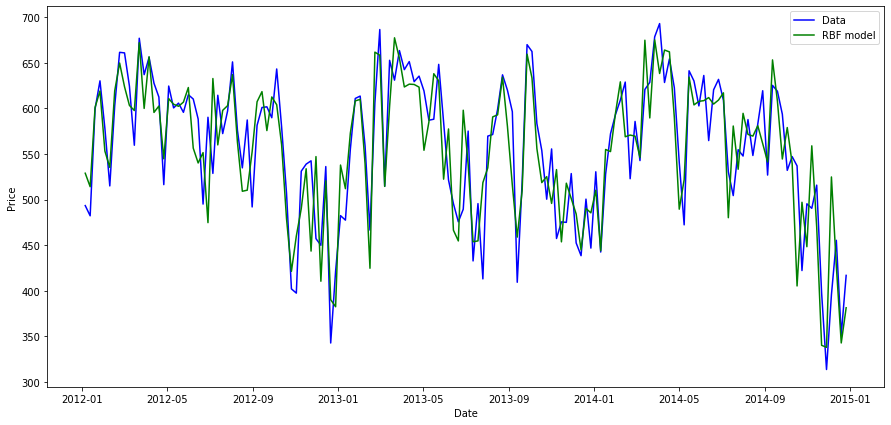

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/LSTMweekly.csv')

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

42.64158300341761

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.06363110493366324